<a href="https://colab.research.google.com/github/benrandoing20/Sketch2CAD/blob/main/AlexNetSketch2CAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [ ]:
# Mounts Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Navigate to appropriate directory with Dataset as starting point
!pwd
%cd drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset

/content/drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset
/content/drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset
[Errno 2] No such file or directory: 'drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset'
/content/drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset


# Import Packages

In [68]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data and Pre-Process IMG

In [49]:
DATA_DIR = '/content/drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset/'
metadata_filename = 'my_dict.csv'

# read in csv into pd DataFrame
df_train = pd.read_csv(metadata_filename)
print(df_train.head())

# count the total number of data samples
n_datasample = len(df_train)
print("Number of training samples:", n_datasample)

# obtain image file from filename associated with row and cache label


                   Name                                                Rep
0  100106_7f144e5b_0000  [[[2, [], [[0.0, 0.0, 0.0, 3.81], [0.0, 0.0, 0...
1  100155_57ec5fc6_0000  [[[1, [[0.0, 0.0, 0.0, 2.8000000000000003, 0.0...
2  100155_bf644f70_0000  [[[1, [[0.0, 0.0, 0.0, 2.8000000000000003, 0.0...
3  100229_aa33a237_0002  [[[2, [[-10.16000032424927, 10.795000372886655...
4  100243_9fb796fe_0005  [[[0, [[-58.27820137826746, -13.94014576968157...
Number of training samples: 7804


# Define Dataset Class


100106_7f144e5b_0000


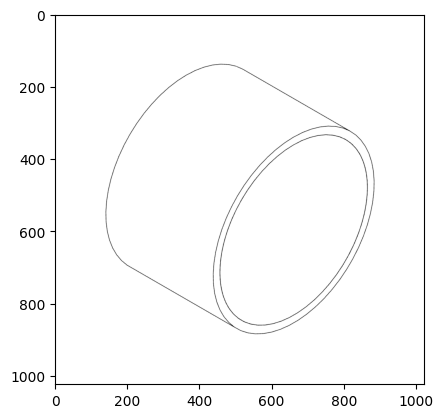

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 

In [71]:
IMG_DIR = '/content/drive/Shareddrives/CS231:Sketch2CAD/CS231N:FinalProject/Dataset/pics/'


class sketchDataset(Dataset):
    # Takes a pandas dataframe input of image filenames under 'Name' and labels under 'Rep'
    def __init__(self, df):
        self.X = df['Name']
        self.y = df['Rep']
        self.transform = T.Compose([
            # T.Resize(100, 5),
            T.ToTensor()
        ])

    def __len__(self):
        # Denotes the total number of samples
        return len(self.X)

    def __getitem__(self, index):
        # Generates one sample of data
        imageFileName = self.X[index]
        # print(imageFileName)
        image = Image.open(IMG_DIR + imageFileName + '.png')
        plt.imshow(image) # check to ensure image is loaded
        plt.show()
        image = self.transform(image)
        return image

data = sketchDataset(df_train)
# print(data[0])

# Define DataLoader Class

129236_61de2aec_0000128043_a1b3b620_0000



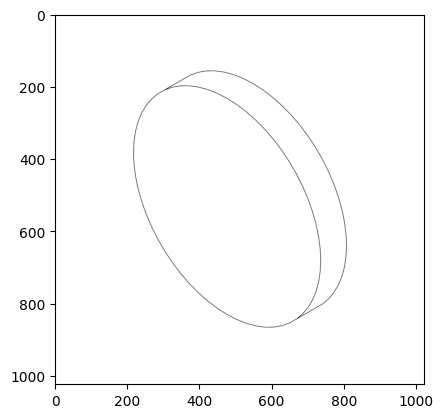

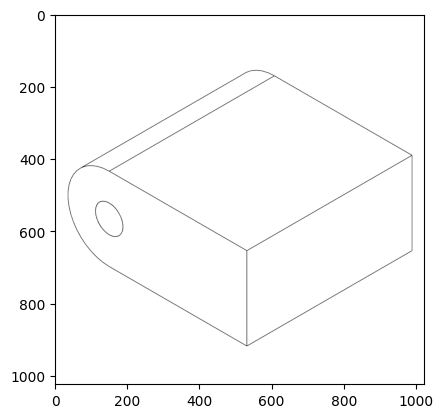

145540_a4f54d5f_0009
21242_6c2af7c2_0007


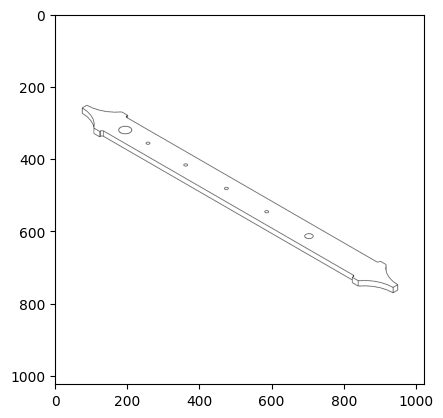

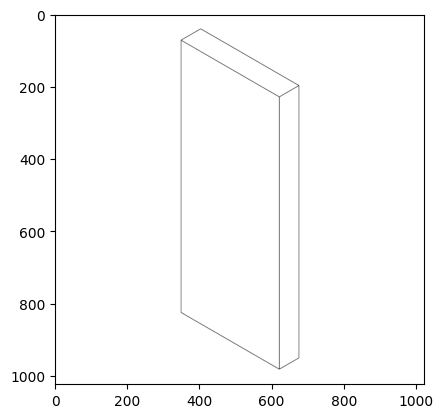

51777_87ff5835_000241303_bd1def52_0006



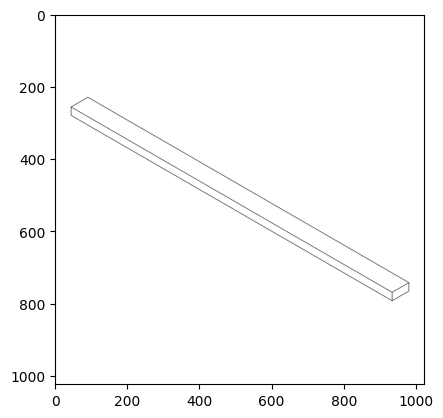

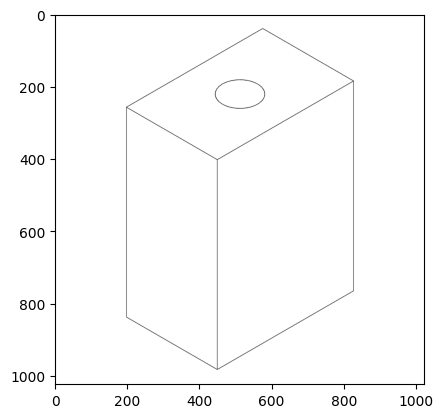

22355_6a8b11c3_0011
134769_524913ff_0000


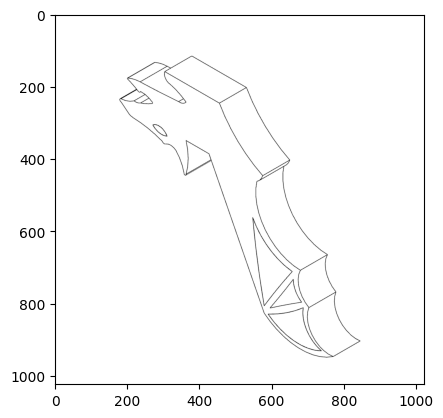

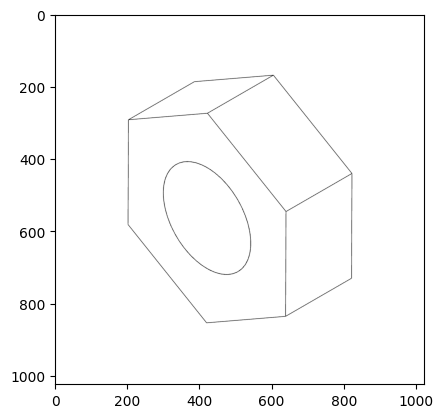

27694_7801dc67_001322225_a3ce4d29_0011



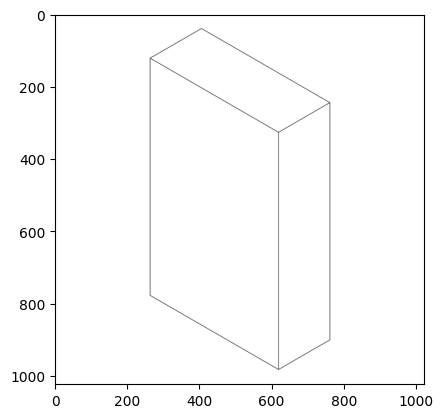

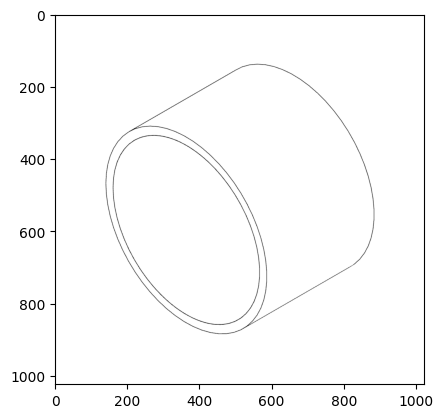

77665_e2629513_0001
56248_b358425c_0001


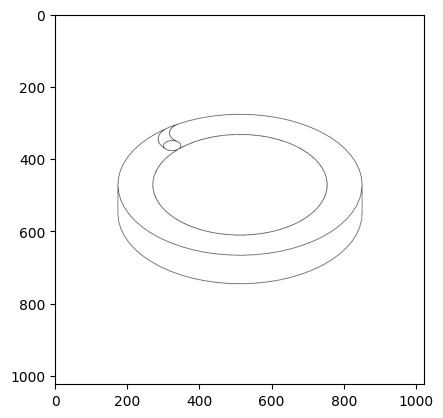

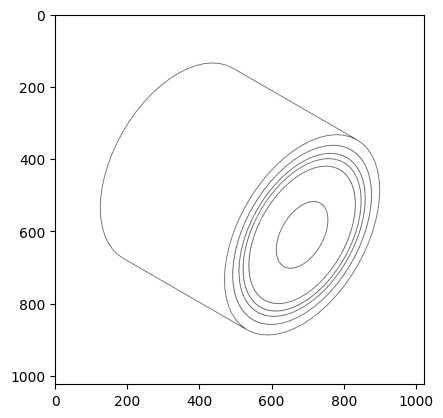

70169_914780d4_0006
79010_1794d489_0000


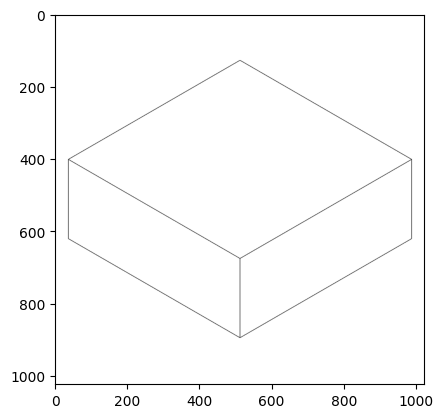

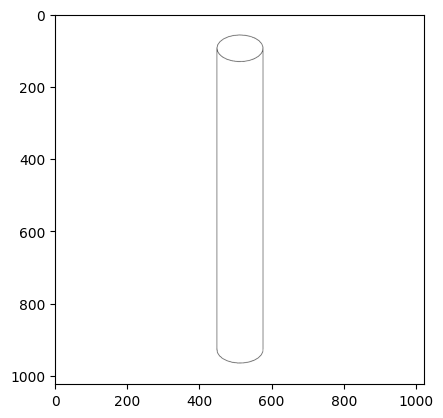

91457_9b6cdf83_0001
30980_d0535092_0000


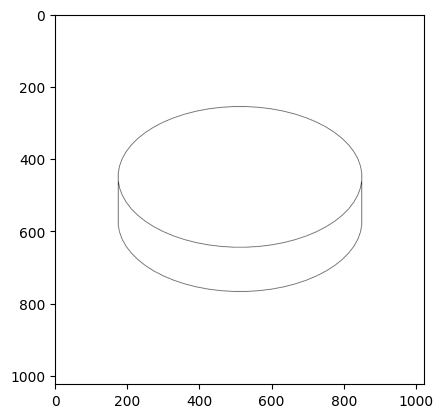

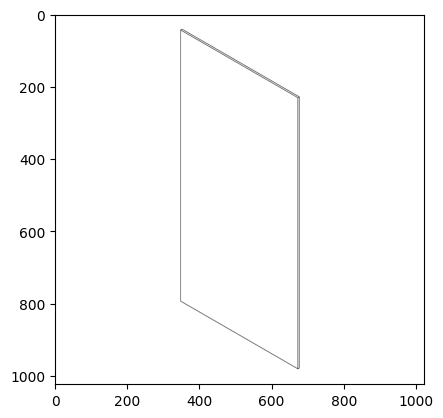

87466_a6bedea0_0000
104453_aba0f2d1_0002


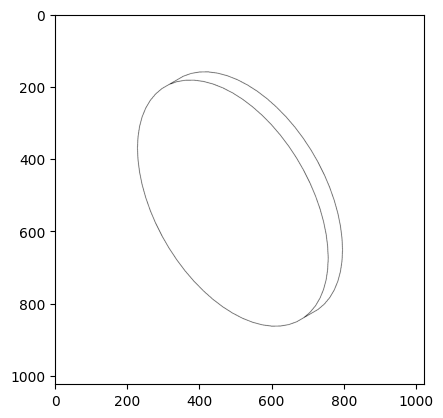

41739_1bc15d9f_0007


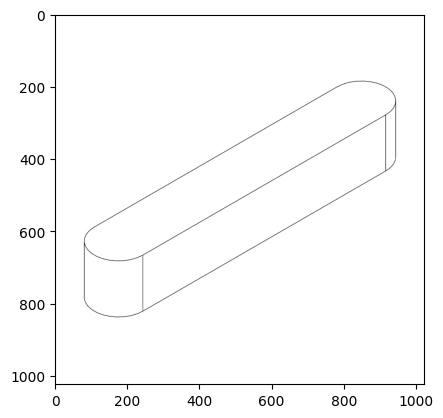

40064_137c5d61_0001


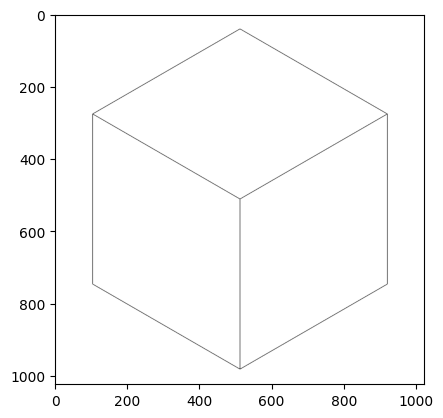

136206_f765760a_0001


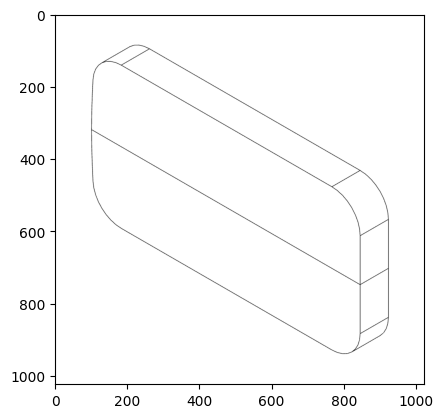

51731_22e19a47_0031


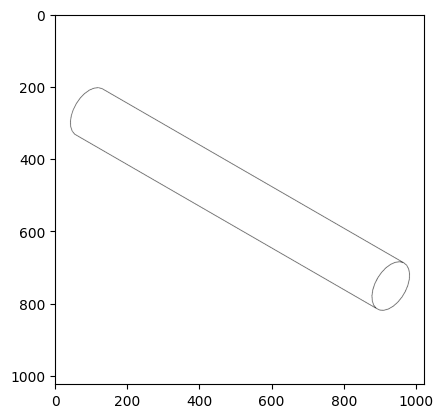

60716_dcd9370c_0002


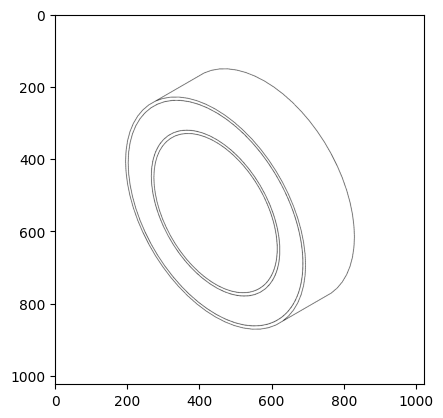

133113_e6041880_0000


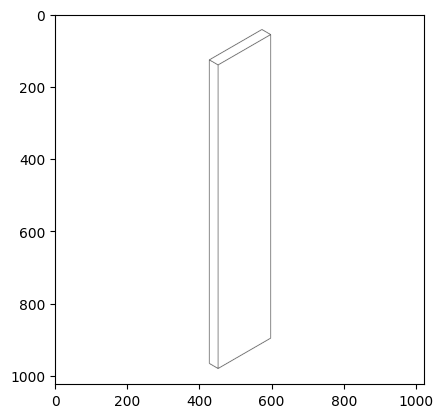

23956_ee17fe48_0003


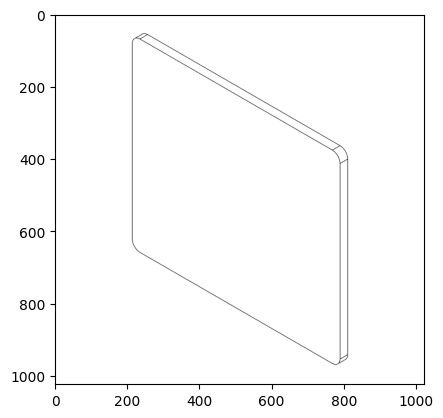

51109_97b211c3_0001


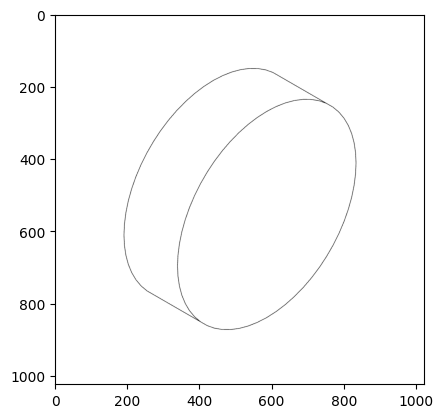

41859_173a686e_0000


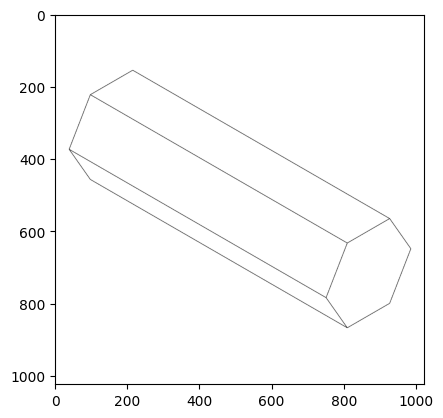

55129_96245c46_0000


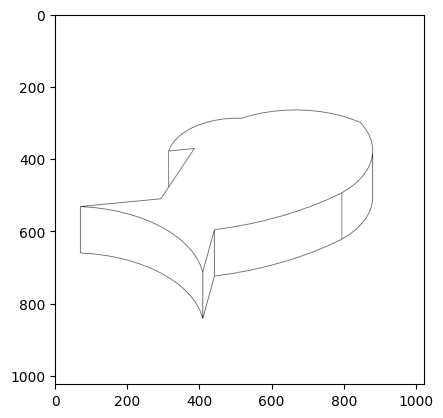

41912_7334aba9_0000


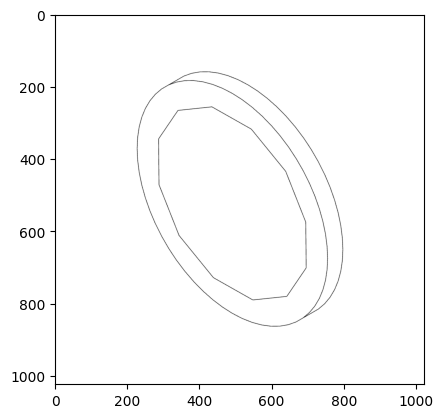

21822_7d3db422_0014


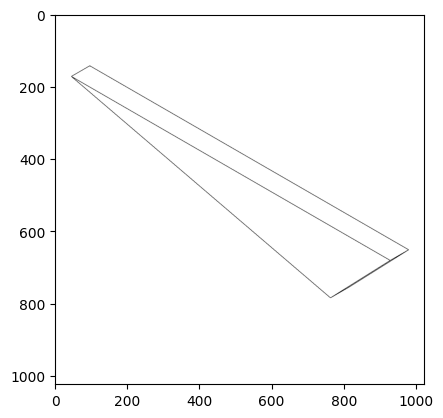

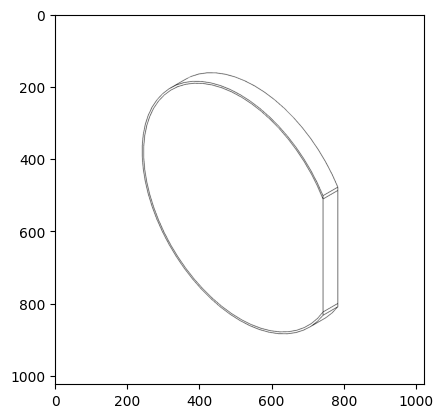

34770_6bba5bd4_0003
140600_a065e504_0012


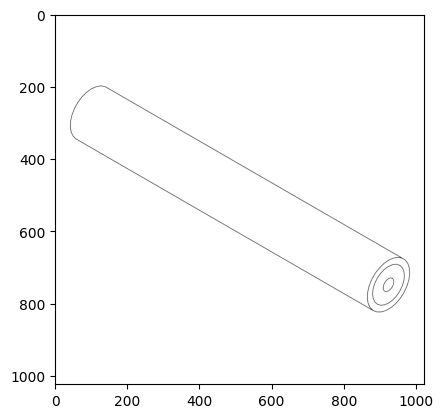

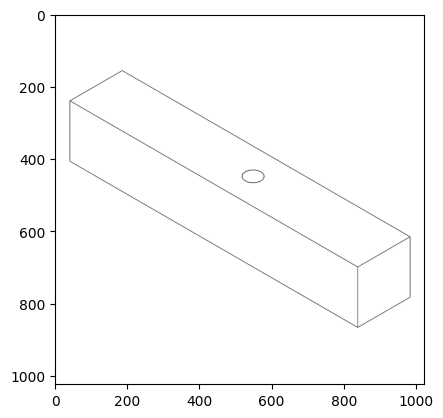

24051_4852a192_0004
50315_0f1419bf_0009


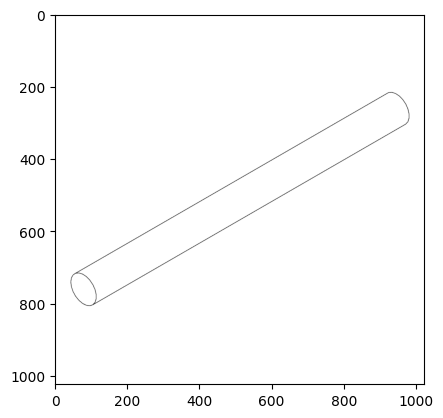

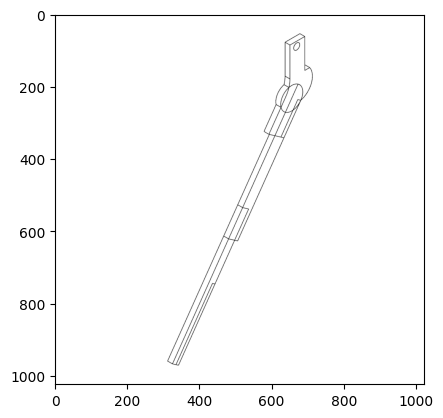

142868_bcc940c6_0000
141848_34f575d3_0004


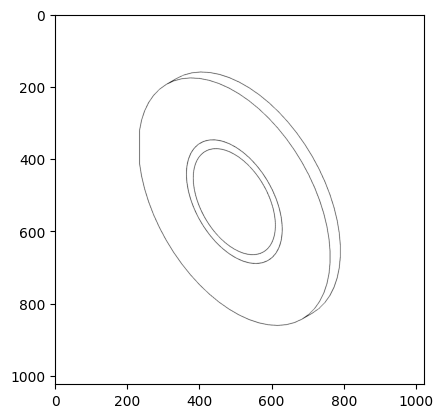

22657_bc1010fa_0007


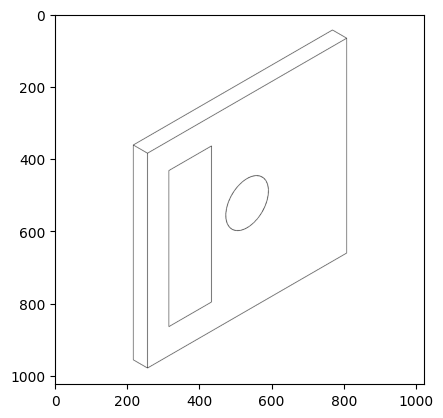

79116_8392be69_0004


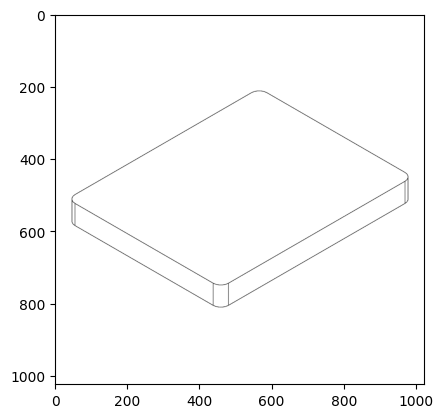

31008_8fa25b35_0009


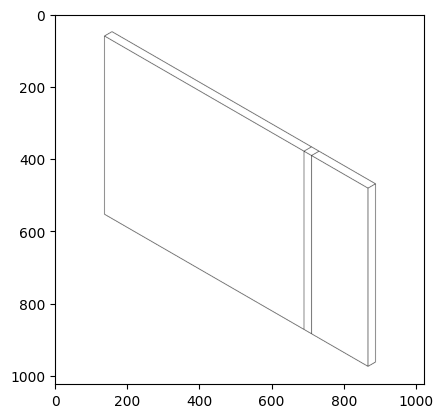

125428_e6d291da_0000


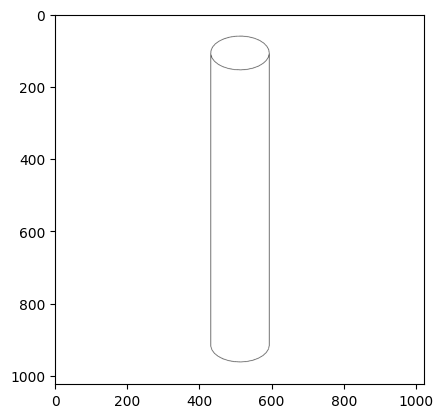

74811_83a8fddf_0000


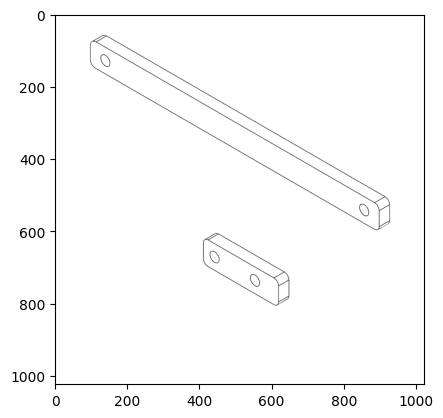

148051_66cb4858_0040


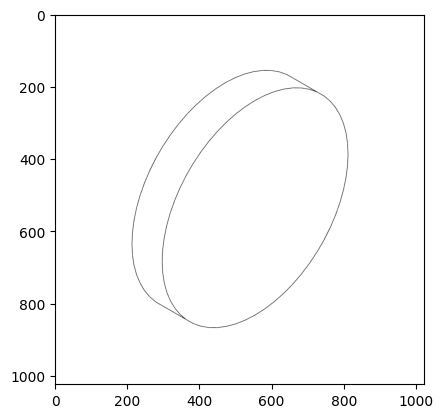

139801_97e2ca6a_0007


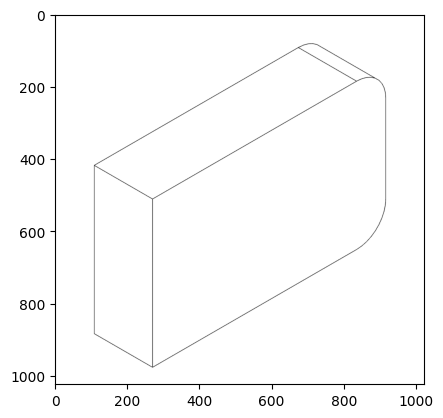

24472_5019aefa_0000


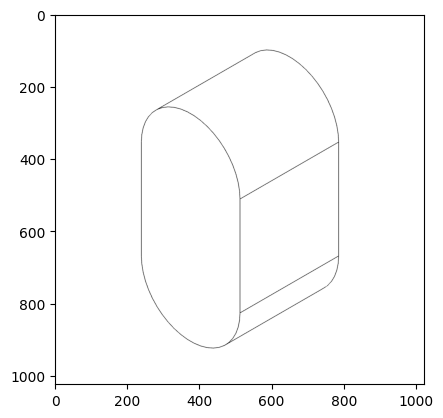

34785_dc3b83fa_0020


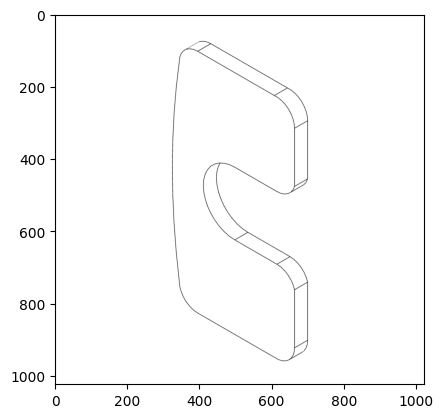

39109_816b707e_0007


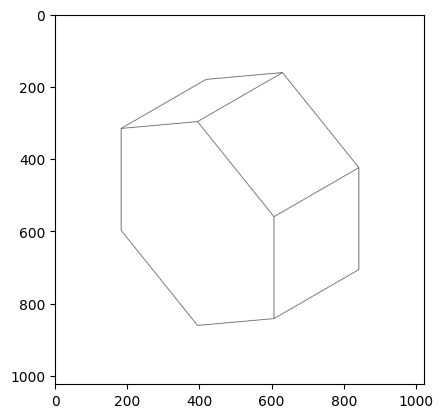

53598_c07e1854_0000


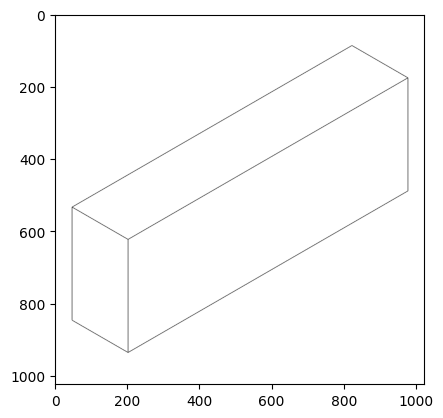

55611_69142616_0018


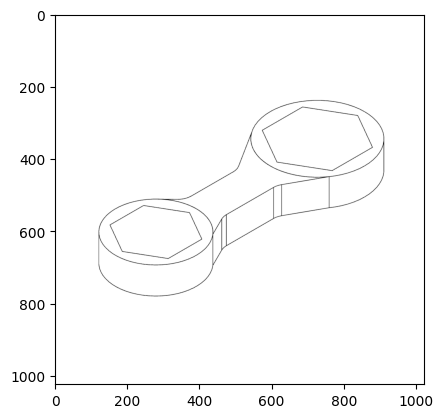

41762_e0b6edc5_0000


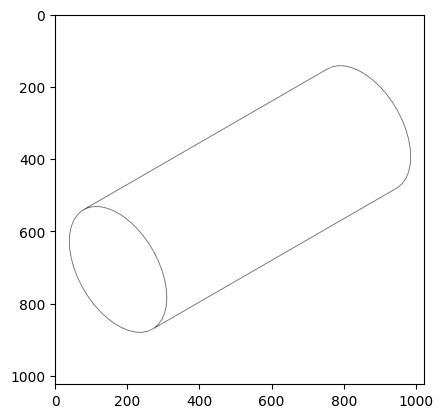

24230_636208ab_0015


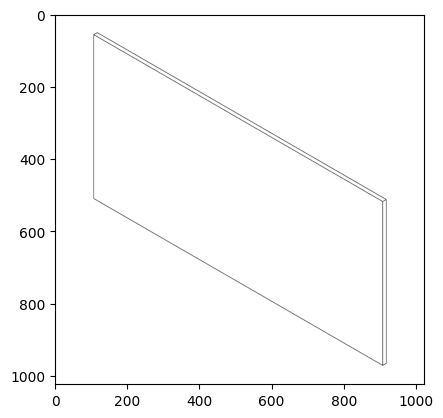

23044_9a964a68_0007


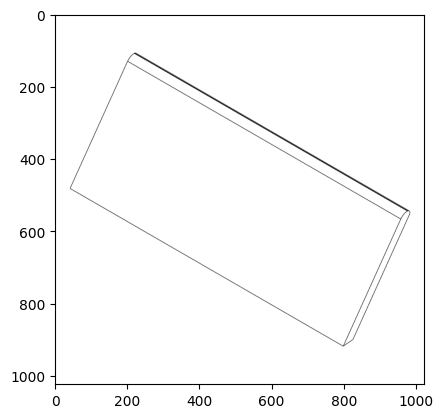

21893_0500d043_0041


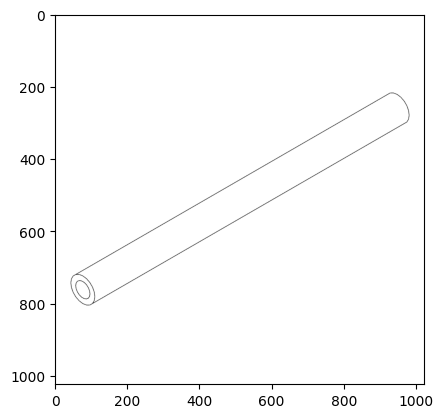

132796_53ed101d_0001


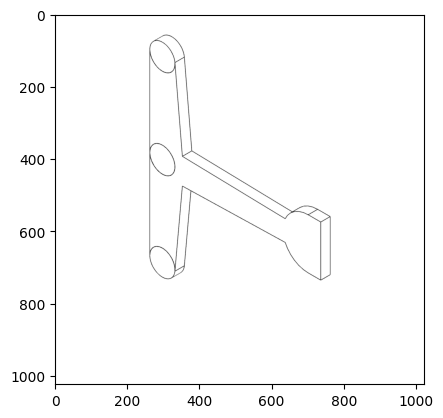

80911_b01bc2a7_0000


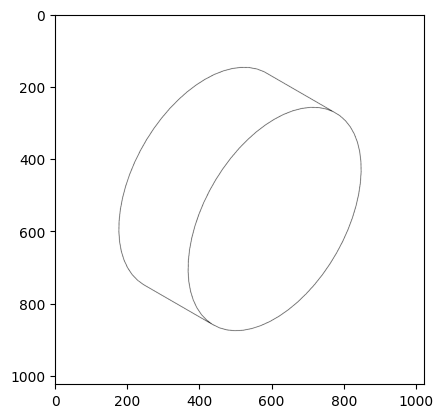

44519_90af0df6_0018


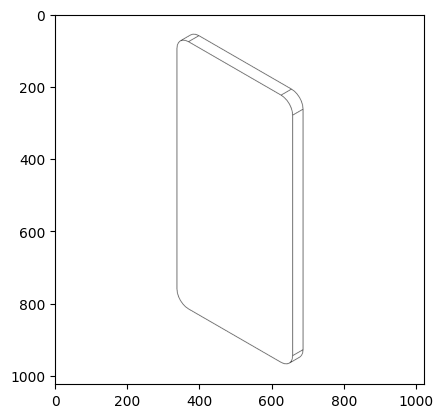

23631_d2b74fdc_0000


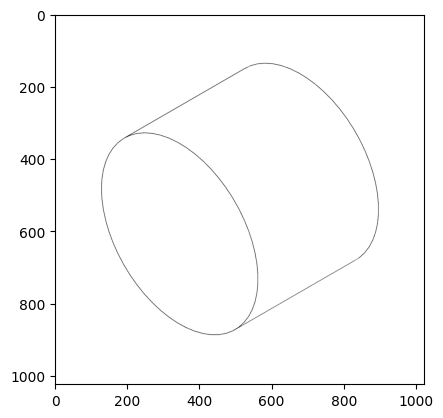

121264_68fcc38a_0000


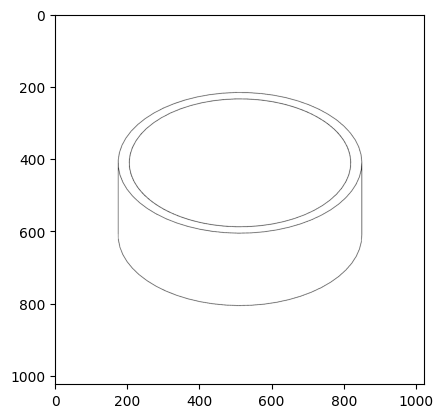

41685_df8ac866_0011


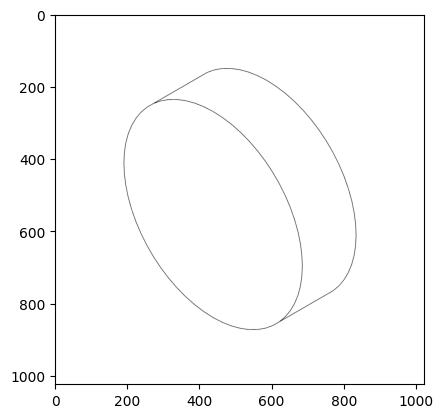

79510_f27c9c97_0000


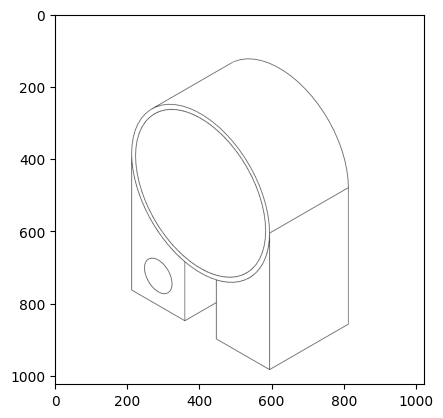

51794_e733d914_0000


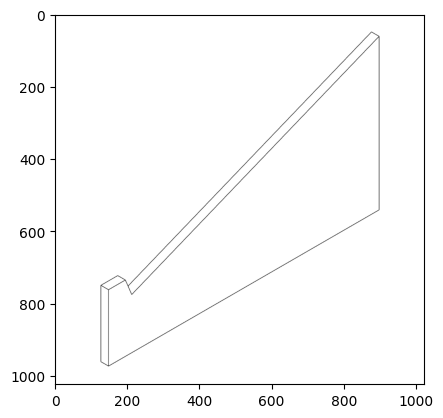

32743_f4c47bbc_0006


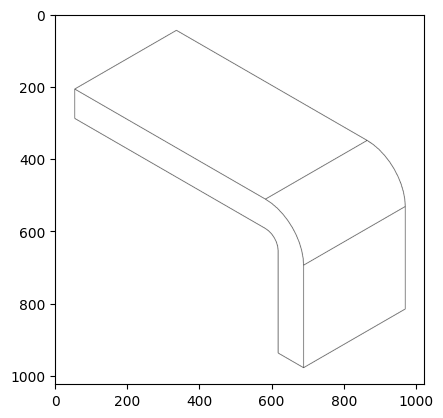

86702_c06b5954_0000


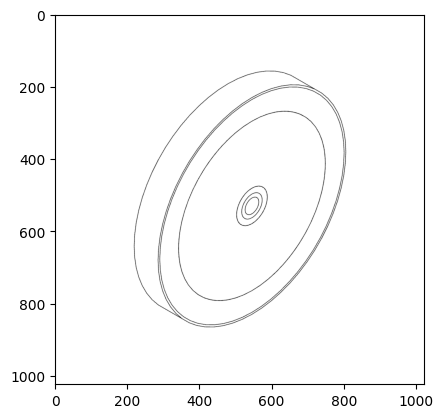

43928_6ca53538_0016


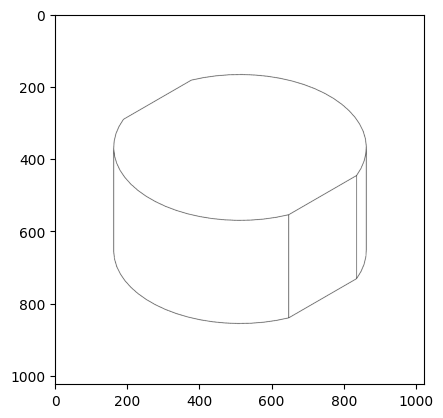

148051_c59af578_0009


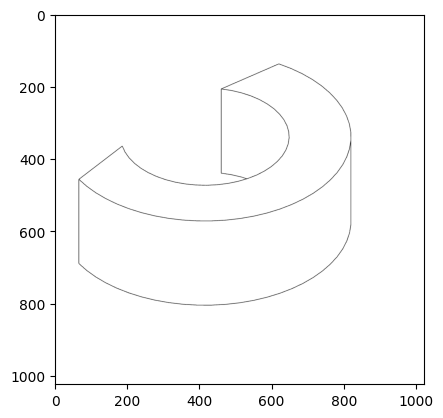

55707_c78416ed_0029


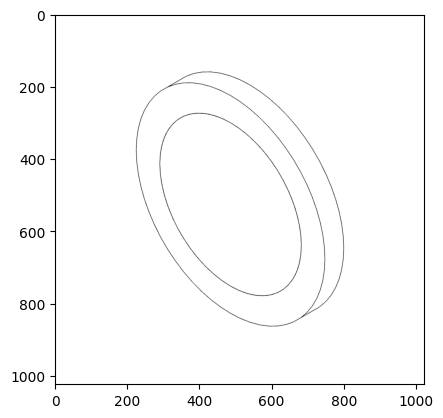

21822_7d3db422_0009


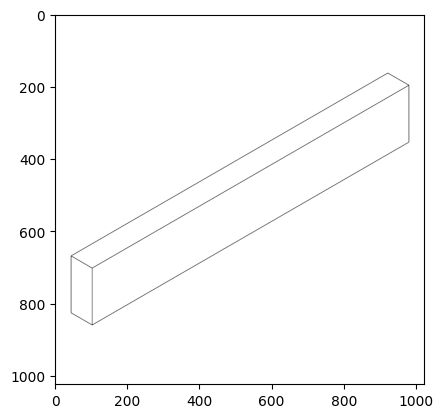

75966_08c4ab3e_0001


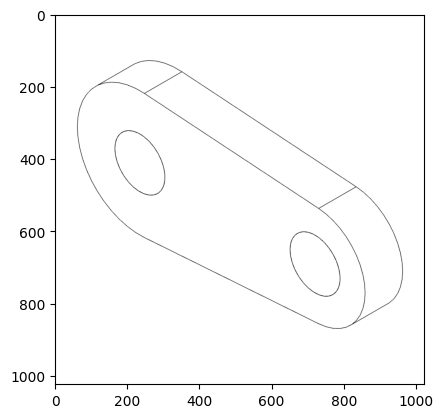

54650_df3655c1_0000


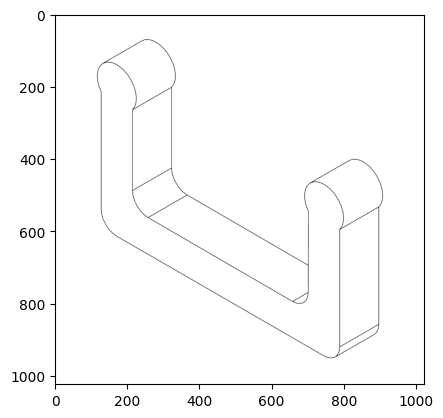

24544_d06c82dd_0009


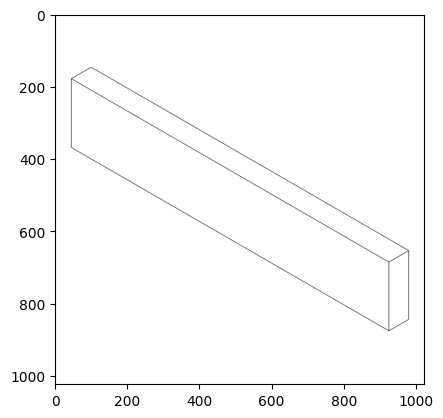

55636_6180bfce_0000


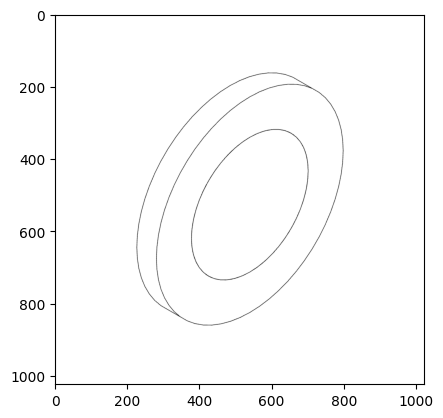

55110_ccc772b9_0008


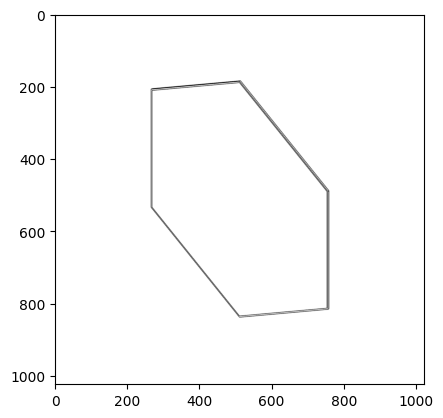

41685_df8ac866_0017


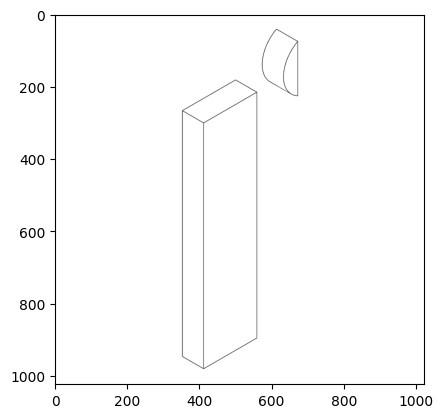

40352_a9774a3f_0009


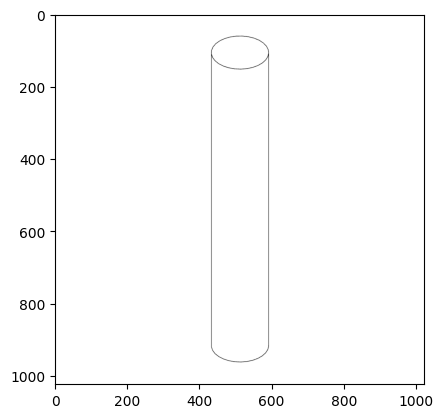

21908_385686ec_0018


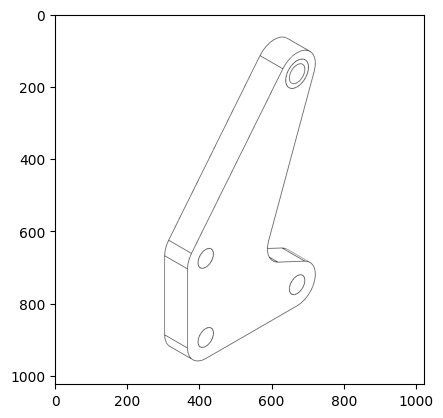

133654_8bd3bccc_0000


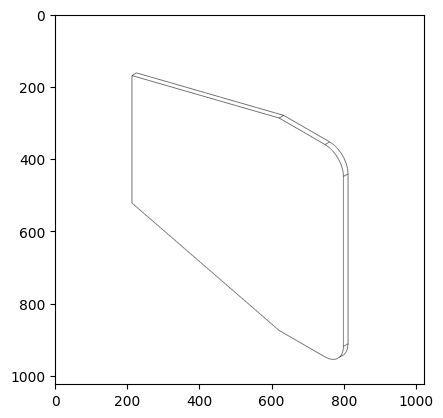

138313_ceb6bcca_0000


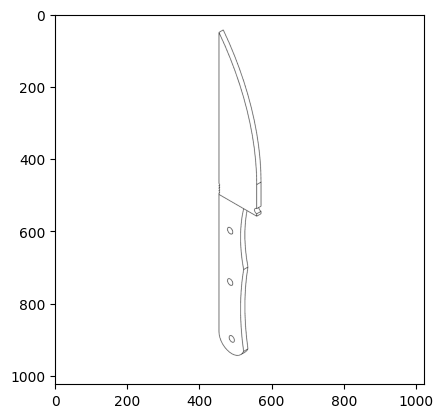

50410_f8f03667_0003


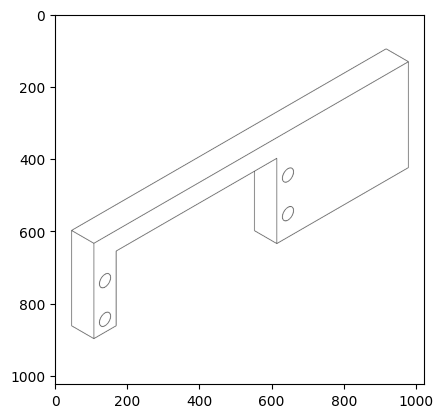

146618_b2f1a4f4_0000


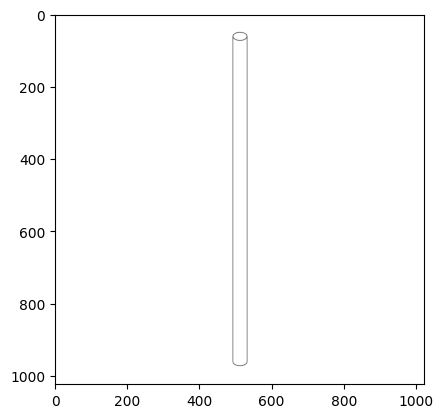

55927_f8b31711_0005


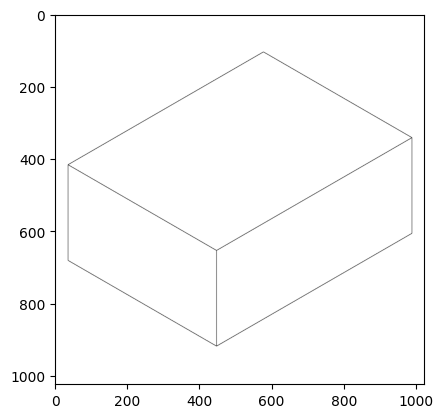

40782_3383cd58_0013


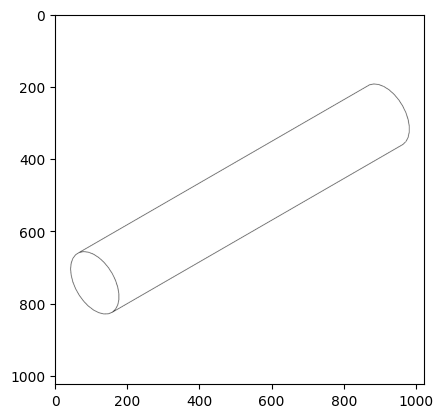

85195_c6ef0067_0001


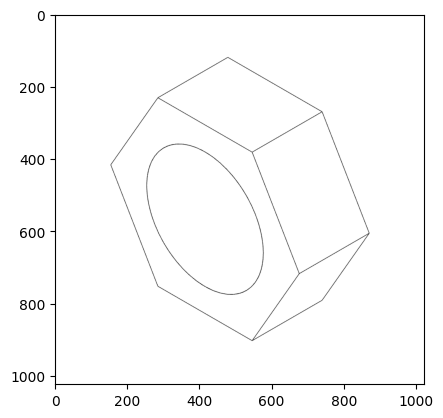

137053_59e609b3_0003


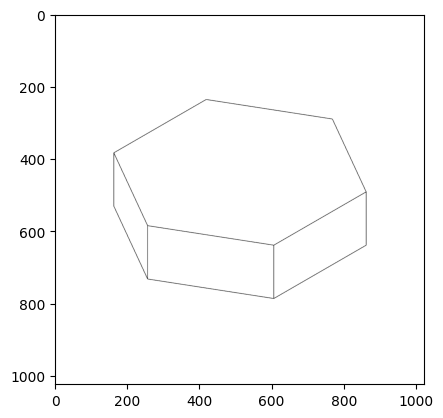

52660_3593651a_0000


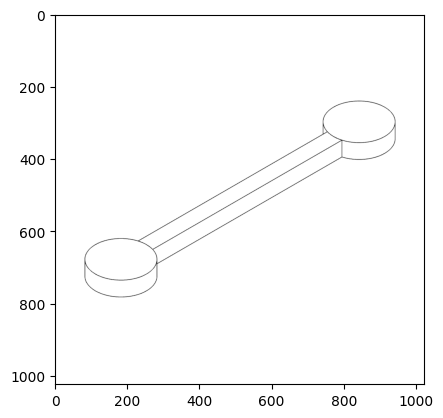

54832_b6237bb1_0000


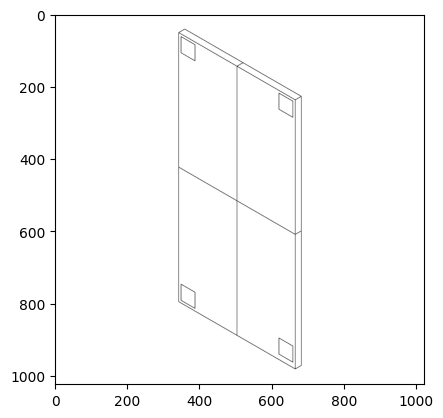

21803_8a36dcda_0017


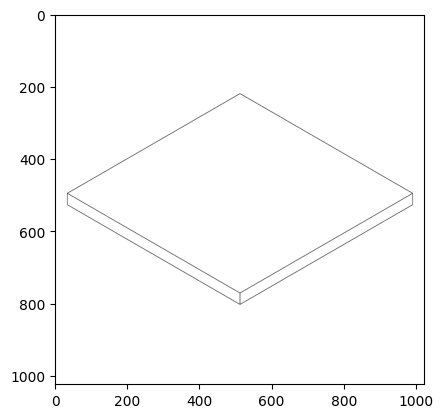

41722_92ab0003_0006


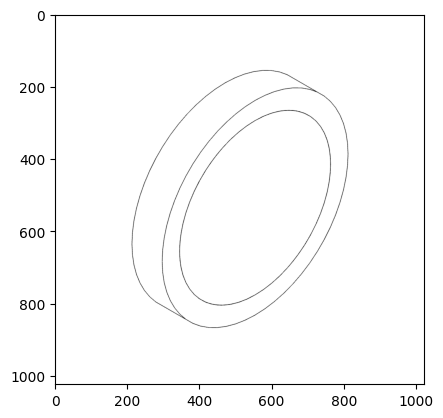

24372_03b260fe_0022


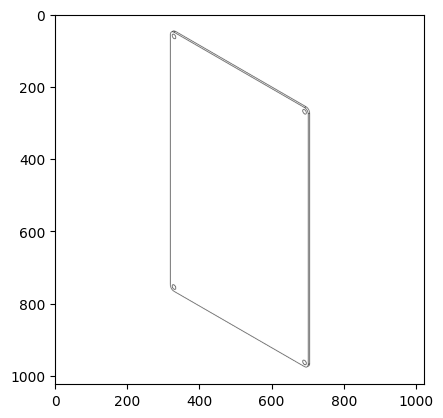

146545_f266050f_0002


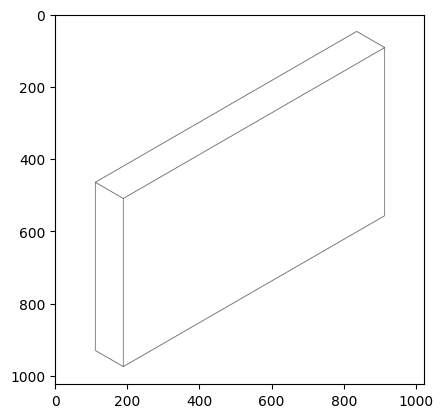

135094_15befe88_0001


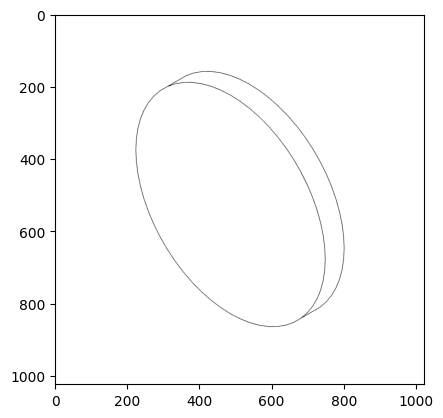

91208_3ef96086_0000


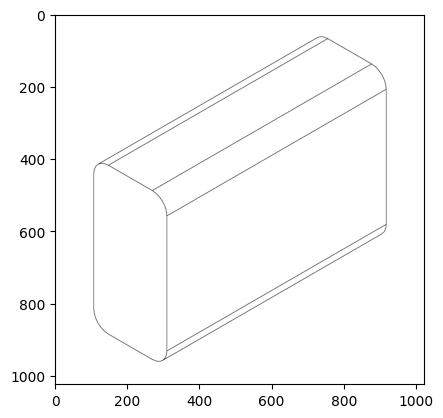

45112_54374f79_0000


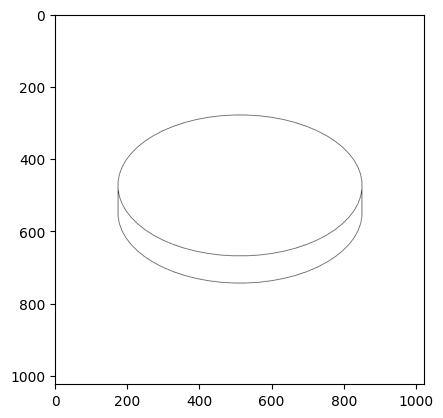

25846_73c80990_0000


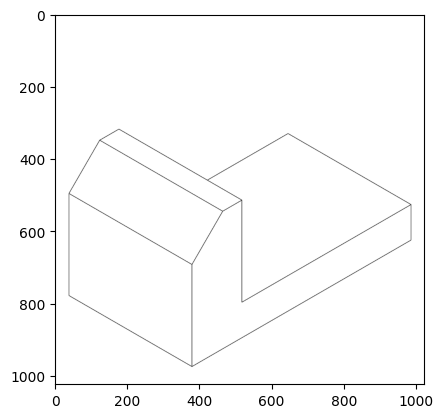

31464_b2855e3a_0000


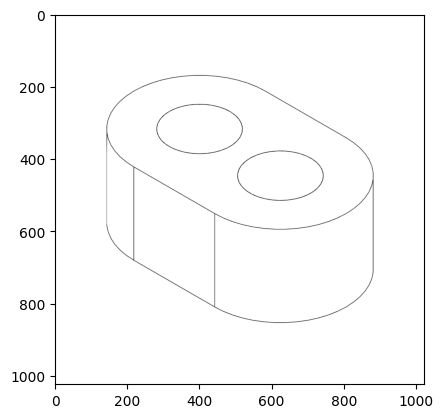

138684_b2780d91_0000


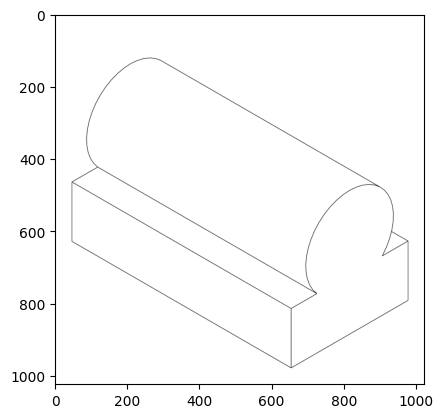

56065_00bbe5da_0017


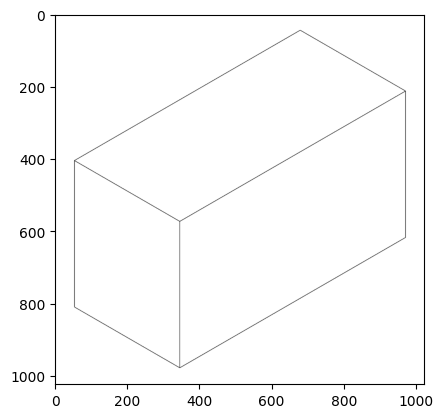

25380_c892ca4e_0000


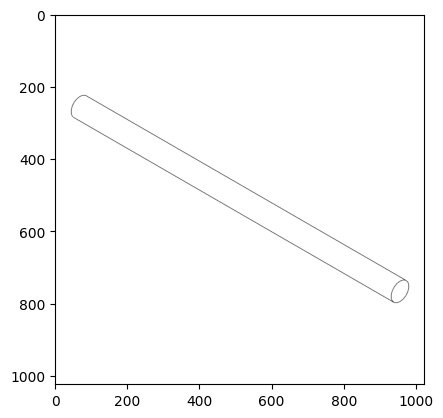

120963_e17cdfa1_0000


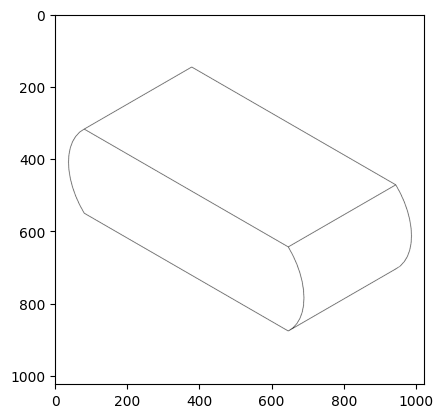

132706_7f4c63c2_0000


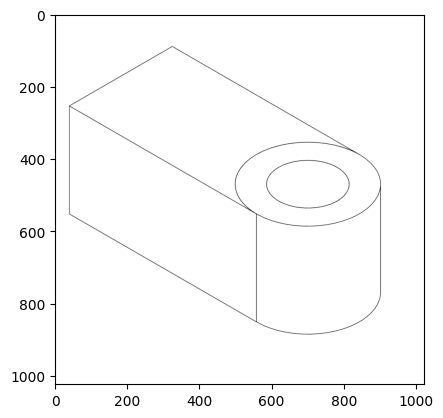

115524_43f29107_0000


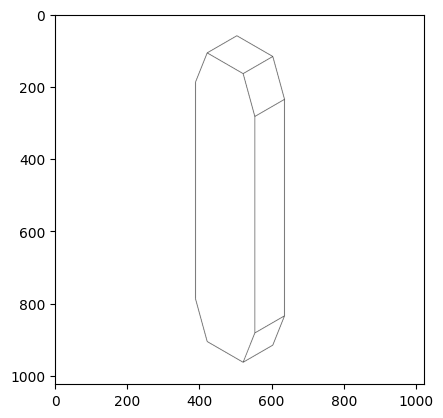

51022_47816098_0000


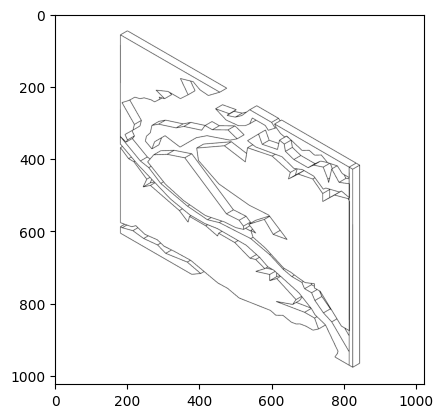

141665_0564e852_0003


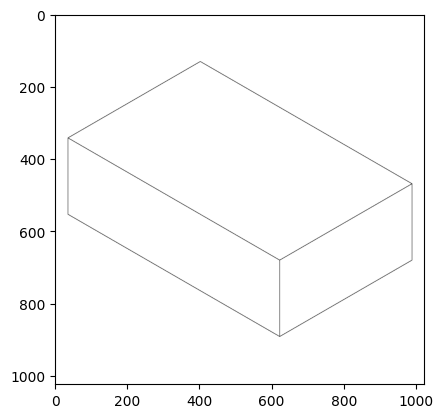

34913_d23e2a24_0003


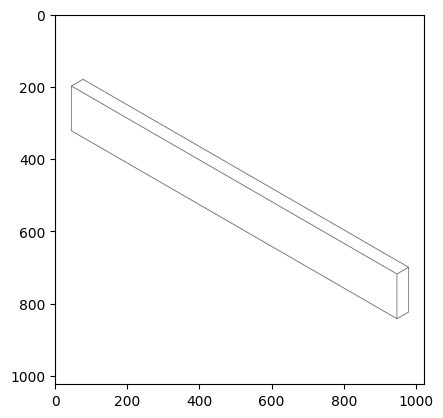

114345_228b4786_0005


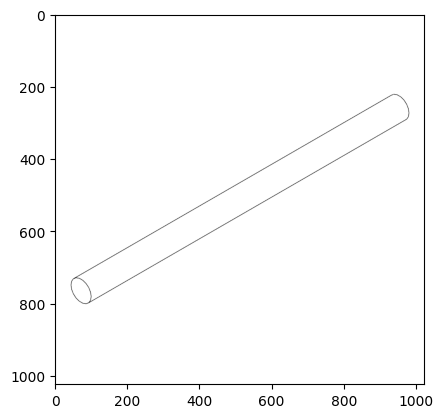

78863_d59be42e_0000


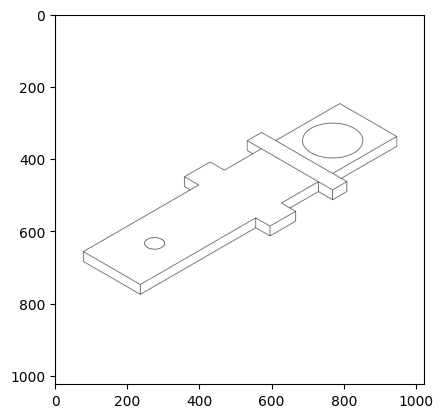

127453_23b625e6_0003


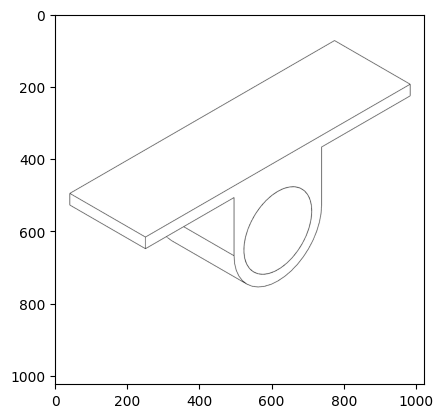

21636_f65686bc_0005


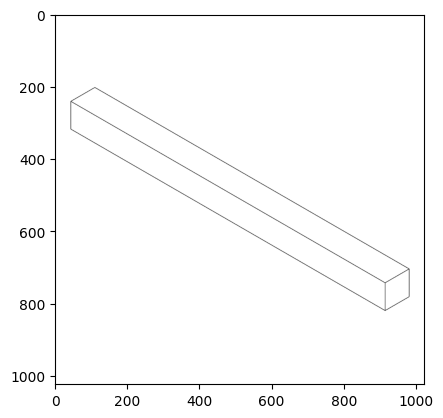

38287_88ec74de_0012


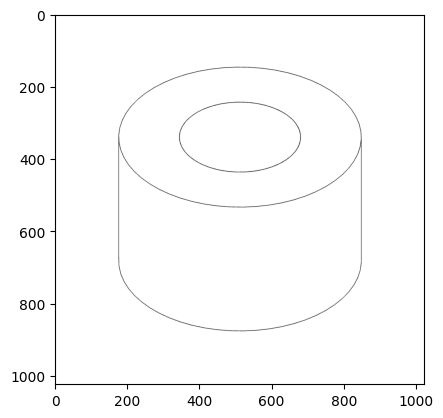

118437_904c2ed5_0000


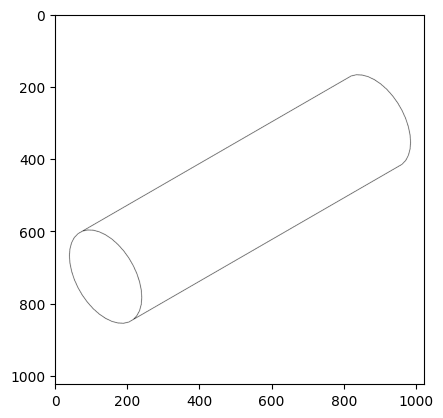

23539_b3917f22_0006


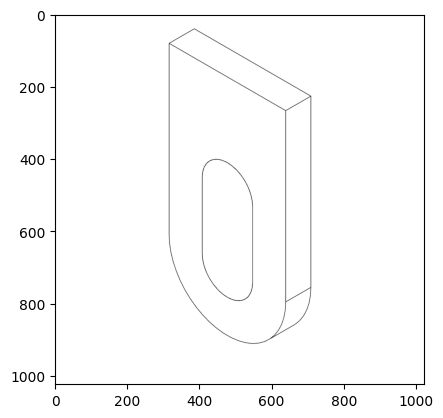

132461_14abd2d0_0003


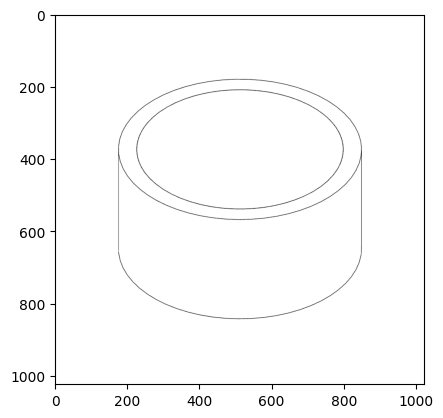

122750_8f5f5638_0000


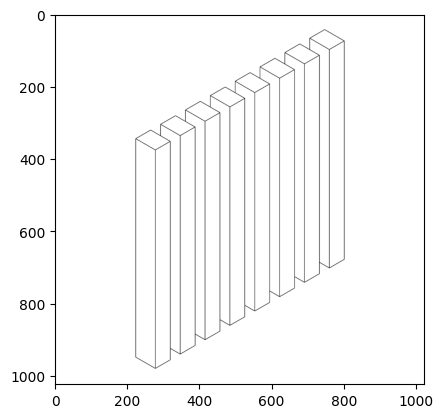

86704_3f8f3bfe_0003


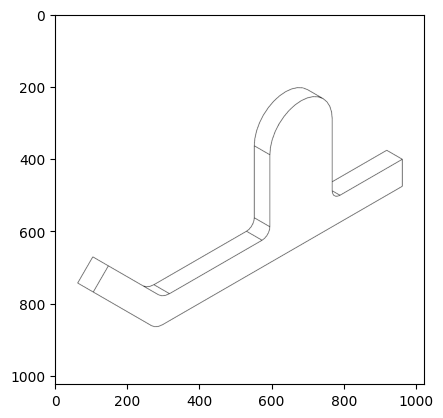

21803_8a36dcda_0009


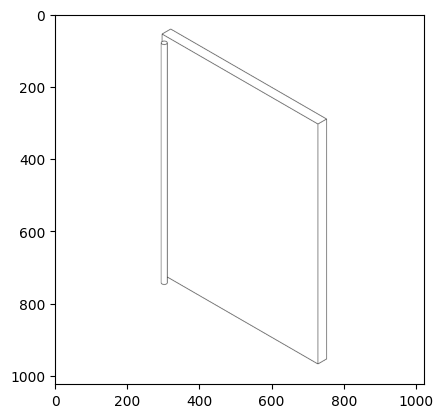

34063_0ca1585e_0008


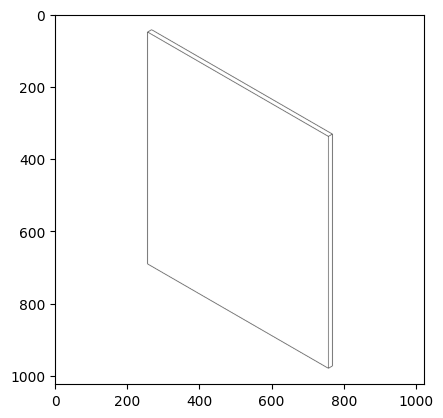

52879_de812eb3_0008


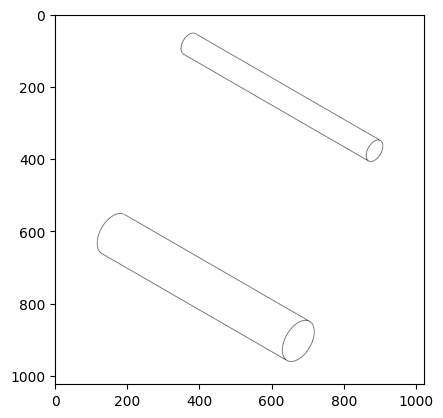

30690_3df2c9e2_0013


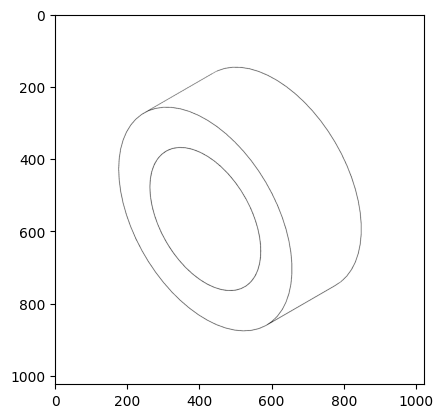

43529_4804941b_0018


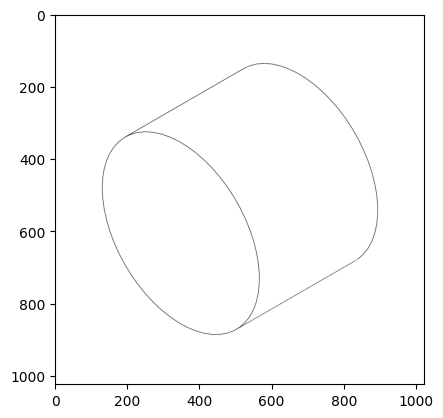

49562_6df35938_0005


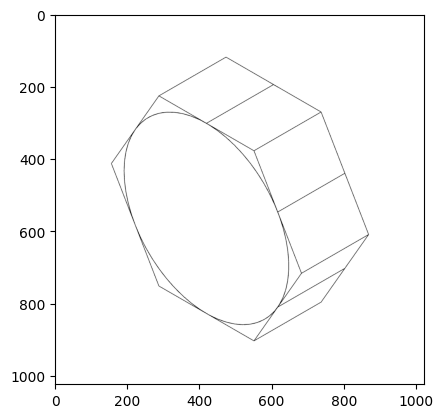

44920_70dd4b80_0002


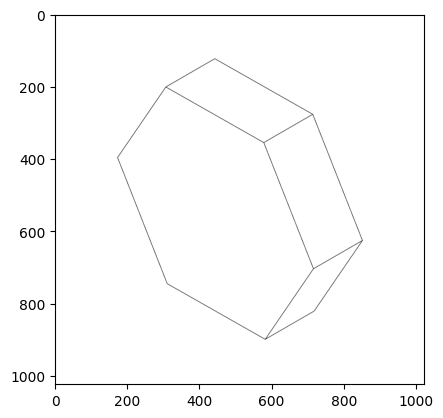

31008_8fa25b35_0014


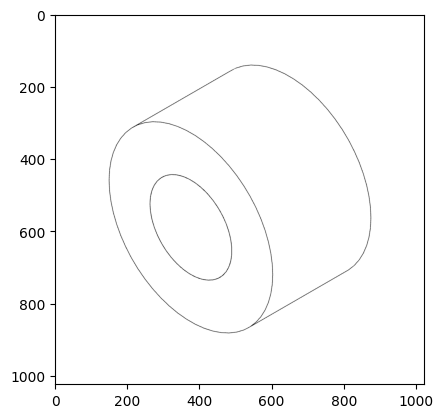

145619_8e3238eb_0003


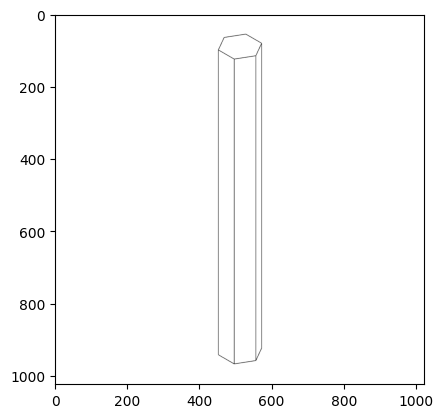

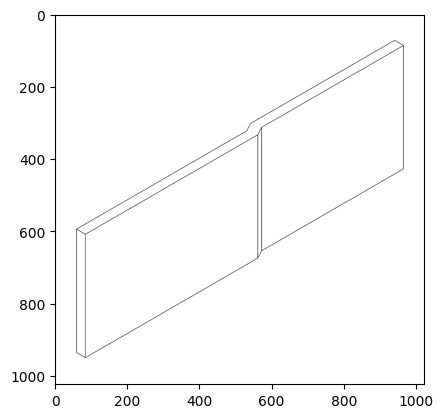

65017_77c9bf53_0002
122423_9ab69fbb_0002


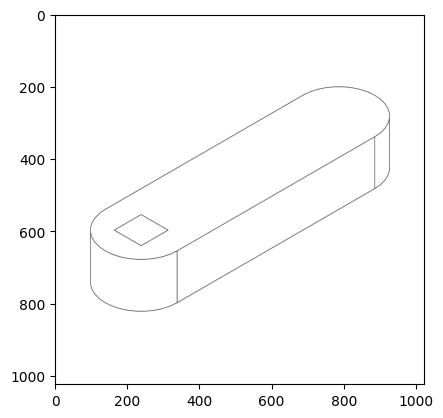

91673_a331a9ee_0000


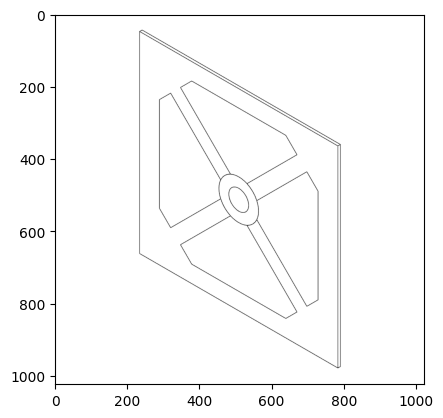

146623_49c31ddf_0001


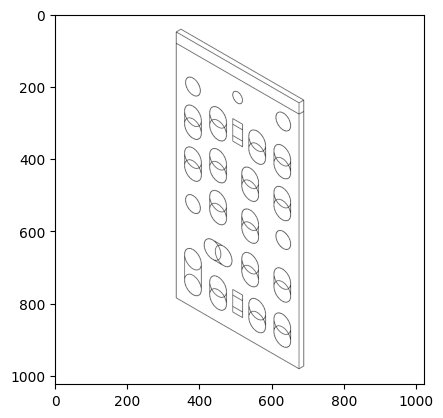

45431_cb452deb_0000


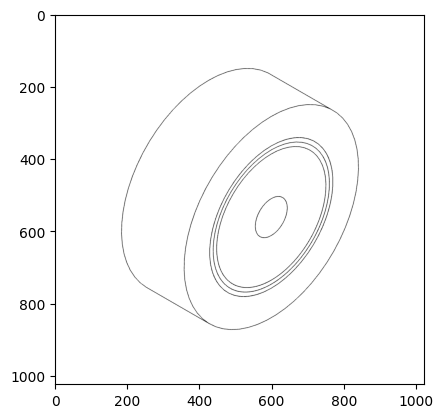

142852_c569311a_0003


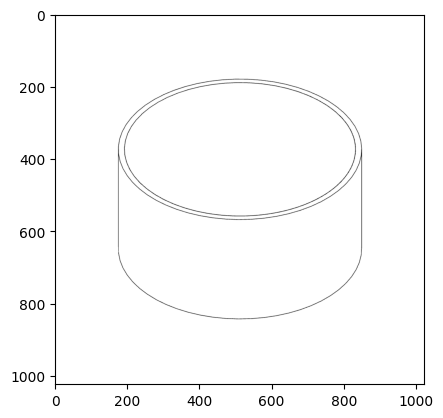

25474_5422a377_0018


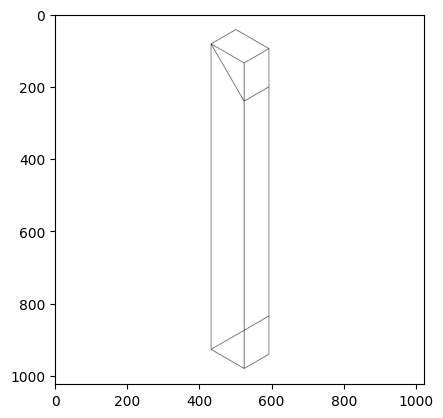

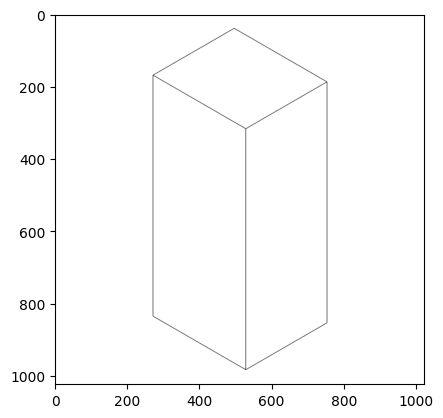

33607_c6f31fa6_0036
83373_34191b87_0000


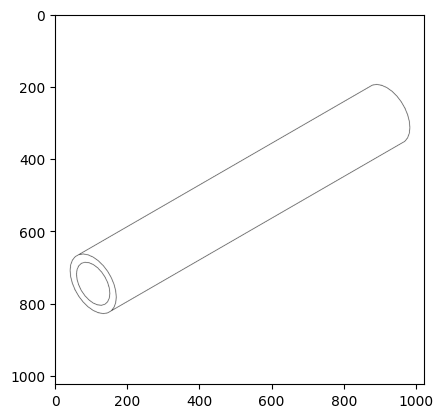

25199_b2422c18_0011


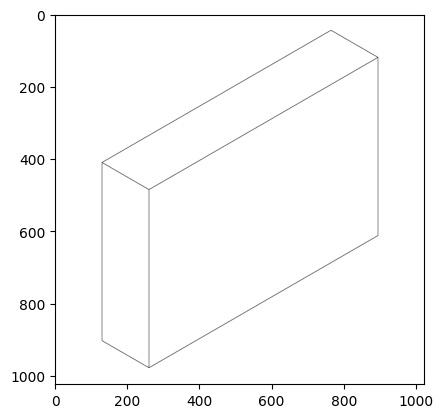

41722_92ab0003_0001


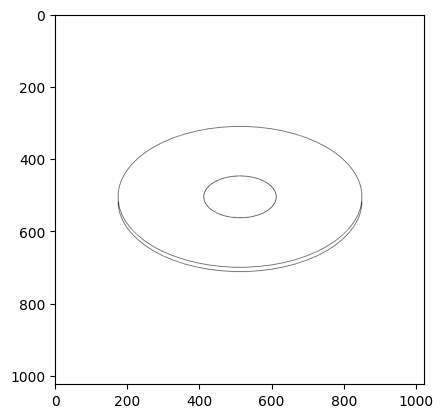

33628_296ae2b8_0000


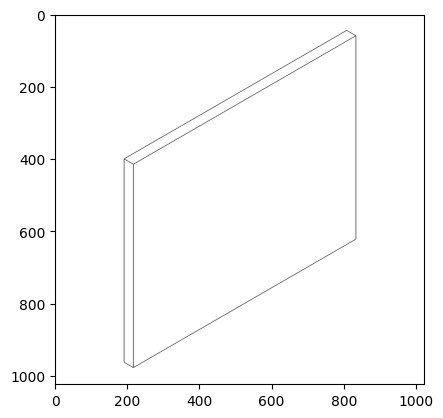

36920_08b32825_0000


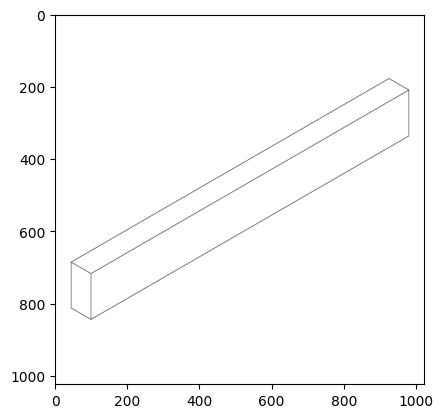

40782_3383cd58_0022


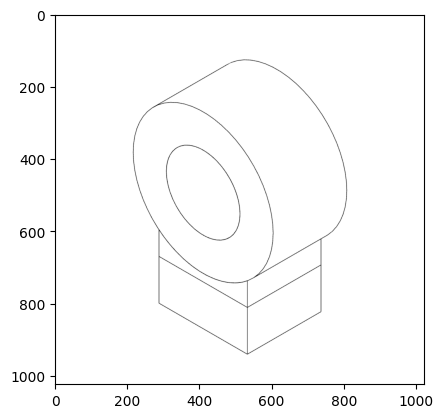

115179_e3a49444_0001


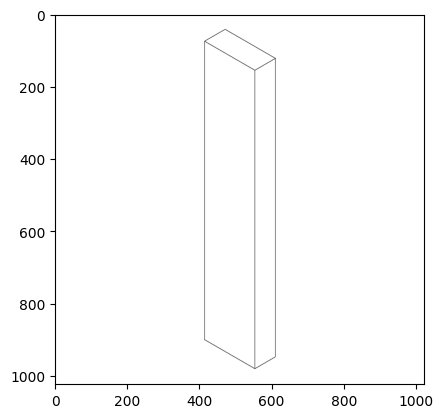

22010_95d37f0e_0001


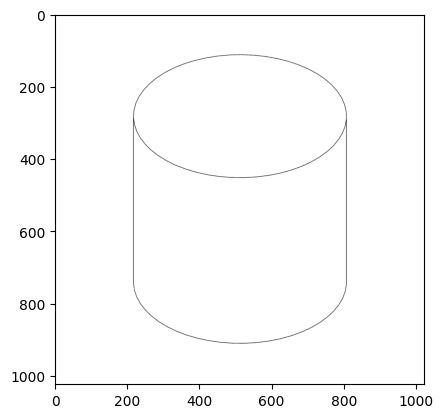

52987_387431ac_0009


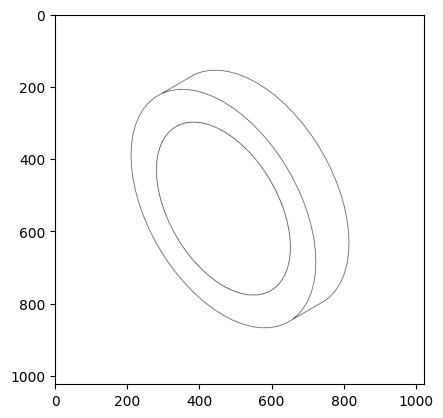

139258_43c33f60_0037


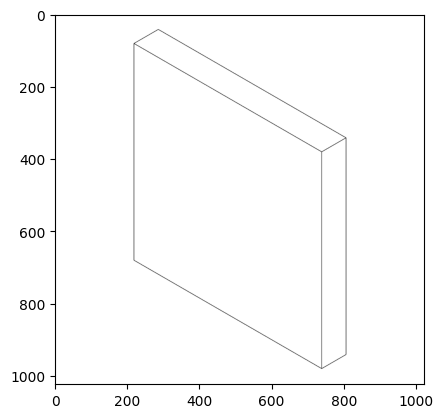

23132_1847c4ef_0002


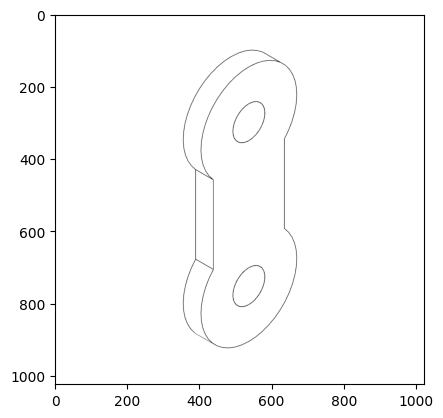

41942_29c07f06_0005


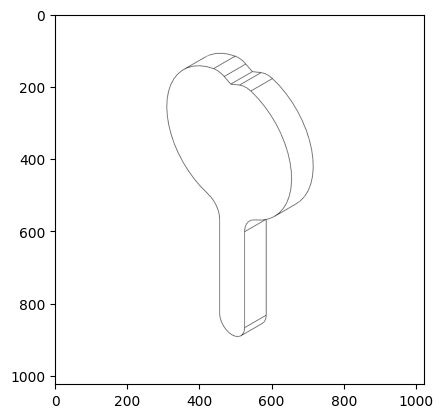

21242_6c2af7c2_0000


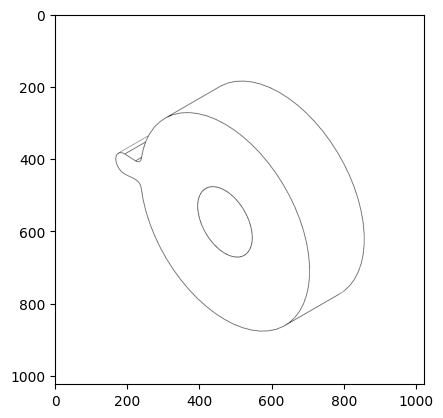

128656_22e204c6_0005


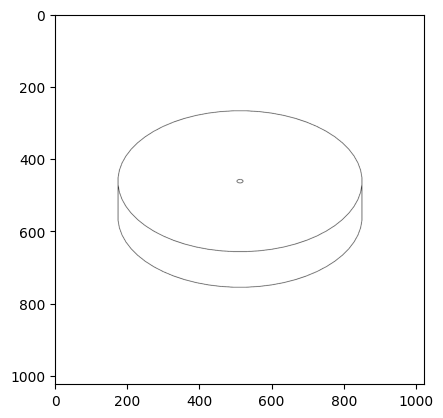

53075_6438cc56_0008


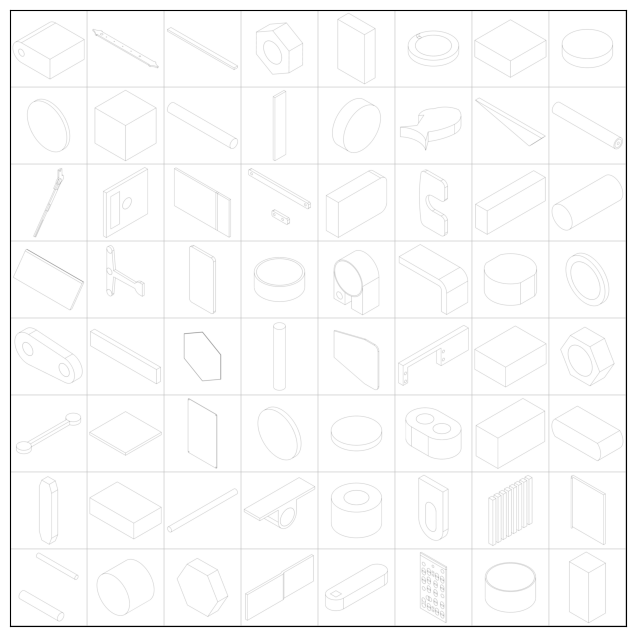

In [78]:
batch_size = 64
train_dl = DataLoader(data, batch_size, shuffle=True, num_workers=2, pin_memory=True)


def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

show_batch(train_dl)

# Train / Valid / Train Split